In [59]:
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [60]:
data = pd.read_csv("data/stackoverflow_full.csv")

In [61]:
data

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


In [62]:
data = data.drop(columns=['Unnamed: 0'])


In [63]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values by imputing with mean
data.fillna(data.mean(), inplace=True)


Missing Values:
Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64


C:\Users\Rj\AppData\Local\Temp\ipykernel_17680\1265254351.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [64]:
# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch', 'Country'])


In [65]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features
numerical_features = ['YearsCode', 'YearsCodePro', 'PreviousSalary']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [66]:
# Fill missing values in 'HaveWorkedWith' column
data['HaveWorkedWith'].fillna("", inplace=True)

# Create a new feature representing the total number of programming languages worked with
data['TotalLanguagesWorkedWith'] = data['HaveWorkedWith'].apply(lambda x: len(x.split(';')) if x != "" else 0)


In [67]:
# Identify and remove outliers in numerical features (using z-score method)
from scipy import stats

z_scores = stats.zscore(data[['YearsCode', 'YearsCodePro', 'PreviousSalary']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]


In [68]:
# Check for and remove duplicate rows
data.drop_duplicates(inplace=True)


In [69]:
data

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,TotalLanguagesWorkedWith
0,<35,No,Master,1,Man,No,Dev,-0.767551,-0.640488,Sweden,-0.327318,C++;Python;Git;PostgreSQL,4,0,4
1,<35,No,Undergraduate,1,Man,No,Dev,-0.235925,-0.514862,Spain,-0.429768,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,12
2,<35,No,Master,1,Man,No,Dev,0.083050,-0.389236,Germany,0.192769,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,7
3,<35,No,Undergraduate,1,Man,No,Dev,-0.554901,-0.389236,Canada,-0.436780,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,13
4,>35,No,PhD,0,Man,No,NotDev,2.741180,2.625783,Singapore,1.882923,C++;Python,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,<35,No,Undergraduate,1,Man,No,Dev,-0.767551,-0.891739,Germany,-0.539370,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1,13
73458,>35,No,Undergraduate,1,Man,No,Dev,0.721002,0.867022,United States of America,0.954775,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1,11
73459,<35,No,Undergraduate,1,Man,No,Dev,-1.086527,-0.766114,Nigeria,-0.202681,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1,12
73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,-0.980202,-1.017365,United States of America,0.045460,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1,15


In [70]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71798 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       71798 non-null  object 
 1   Accessibility             71798 non-null  object 
 2   EdLevel                   71798 non-null  object 
 3   Employment                71798 non-null  int64  
 4   Gender                    71798 non-null  object 
 5   MentalHealth              71798 non-null  object 
 6   MainBranch                71798 non-null  object 
 7   YearsCode                 71798 non-null  float64
 8   YearsCodePro              71798 non-null  float64
 9   Country                   71798 non-null  object 
 10  PreviousSalary            71798 non-null  float64
 11  HaveWorkedWith            71798 non-null  object 
 12  ComputerSkills            71798 non-null  int64  
 13  Employed                  71798 non-null

In [71]:
data.describe()

,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,TotalLanguagesWorkedWith
count,71798.000000,71798.000000,71798.000000,71798.000000,71798.000000,71798.000000,71798.000000
mean,0.885442,-0.060607,-0.070925,-0.027208,13.477994,0.538344,13.477994
std,0.318489,0.914920,0.875388,0.978129,7.039559,0.498531,7.039559
min,0.000000,-1.511828,-1.142991,-1.369009,0.000000,0.000000,0.000000
25%,1.000000,-0.767551,-0.766114,-0.797010,8.000000,0.000000,8.000000
50%,1.000000,-0.342250,-0.389236,-0.227374,13.000000,1.000000,13.000000
75%,1.000000,0.508351,0.364519,0.524387,17.000000,1.000000,17.000000
max,1.000000,2.953831,2.877035,2.999724,107.000000,1.000000,107.000000


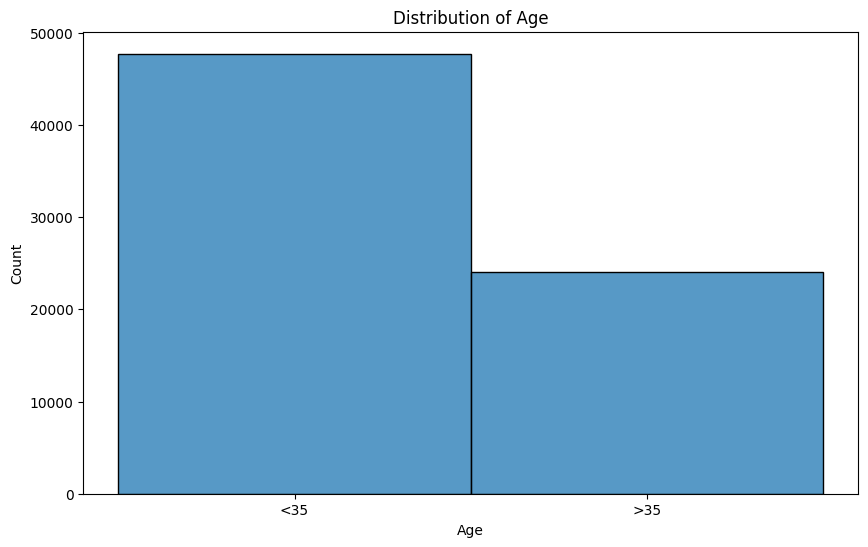

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

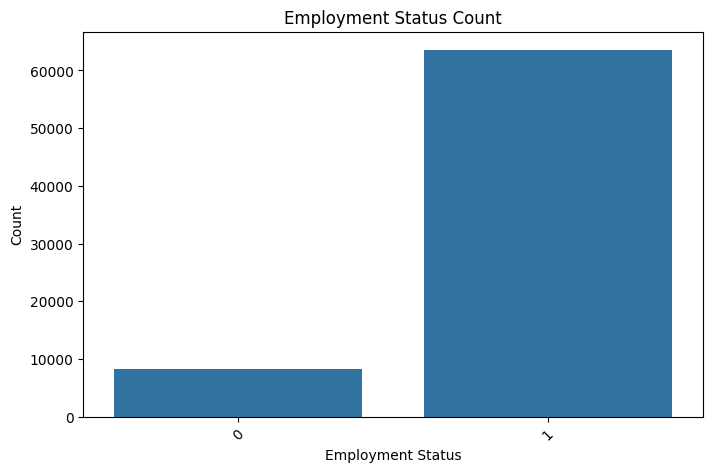

In [73]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Employment')
plt.title('Employment Status Count')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\Rj\AppData\Local\Temp\ipykernel_17680\571606977.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


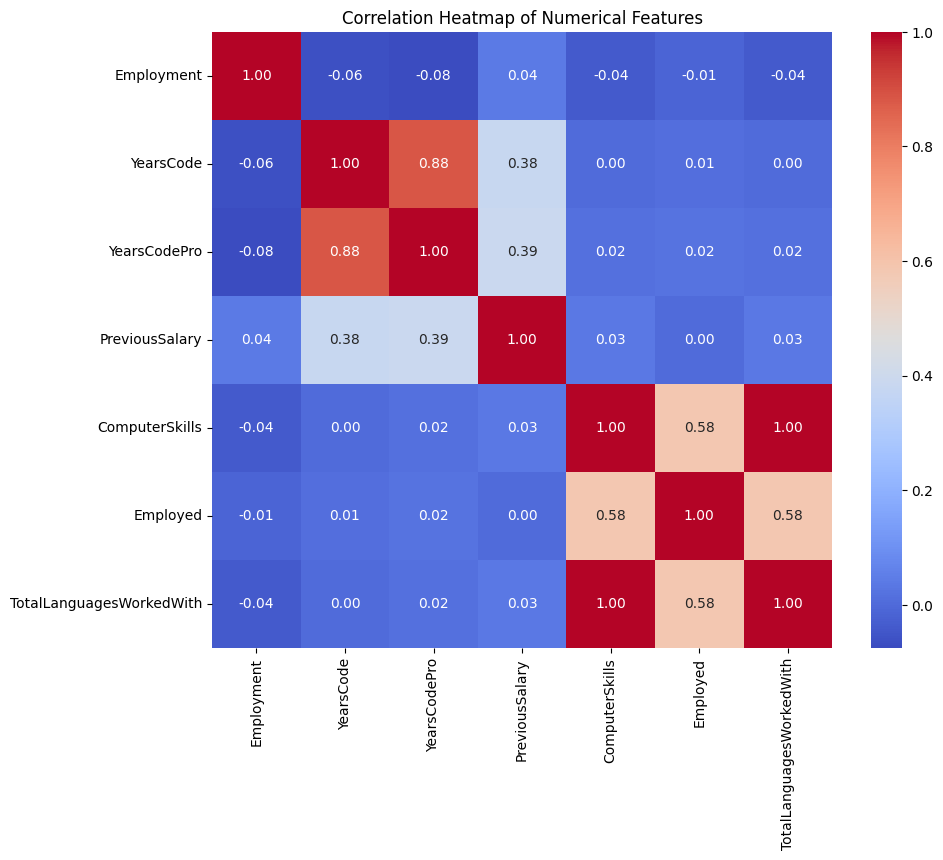

In [74]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [80]:
features = [ 'EdLevel', 'YearsCode', 'PreviousSalary', 'TotalLanguagesWorkedWith', 'Employed']


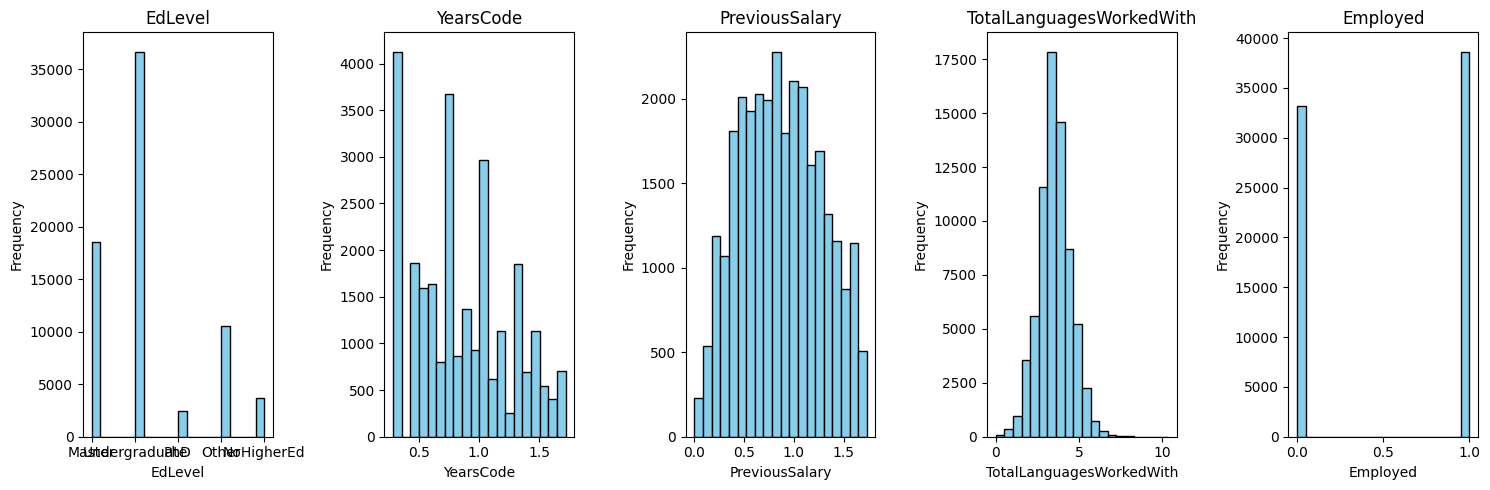

In [81]:
import matplotlib.pyplot as plt

# Select features for visualization

# Plot histograms for selected features
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


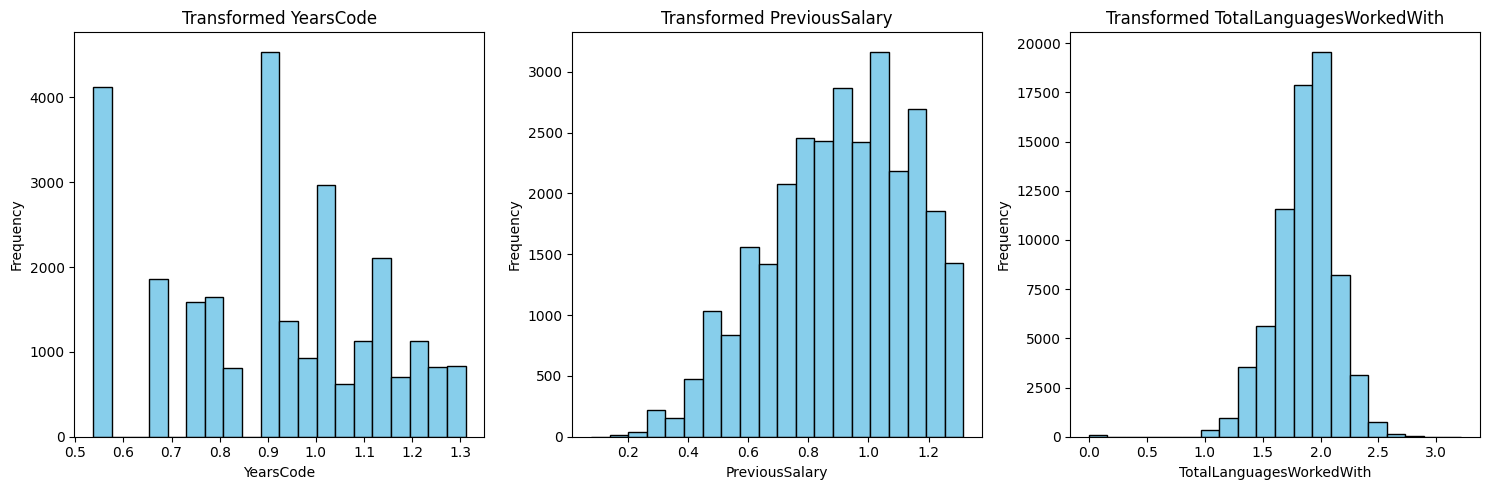

In [82]:
import numpy as np
from scipy.stats import boxcox

# Select features to transform (assuming 'YearsCode' and 'PreviousSalary' are skewed)
skewed_features = ['YearsCode', 'PreviousSalary','TotalLanguagesWorkedWith']

for feature in skewed_features:
    data[feature] = np.sqrt(data[feature])

# Visualize the distribution of transformed features
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

for i, feature in enumerate(skewed_features, 1):
    plt.subplot(1, len(skewed_features), i)
    plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Transformed {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [94]:
X = data[features]


In [95]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['EdLevel'])
    ],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

In [97]:
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Fit and transform the data
data_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Check if any missing values remain
print(data_imputed.isnull().sum())

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [88]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Feature selection and preprocessing
# Assuming X_scaled is your preprocessed and scaled feature matrix

# Initialize empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Define the range of clusters to test
k_range = range(1, 11)

# Calculate WCSS for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [43]:
n_clusters = 2


In [44]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [45]:
data['Cluster'] = kmeans.labels_


In [46]:
cluster_summary = data.groupby('Cluster').mean()


C:\Users\Rj\AppData\Local\Temp\ipykernel_17680\282431011.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = data.groupby('Cluster').mean()


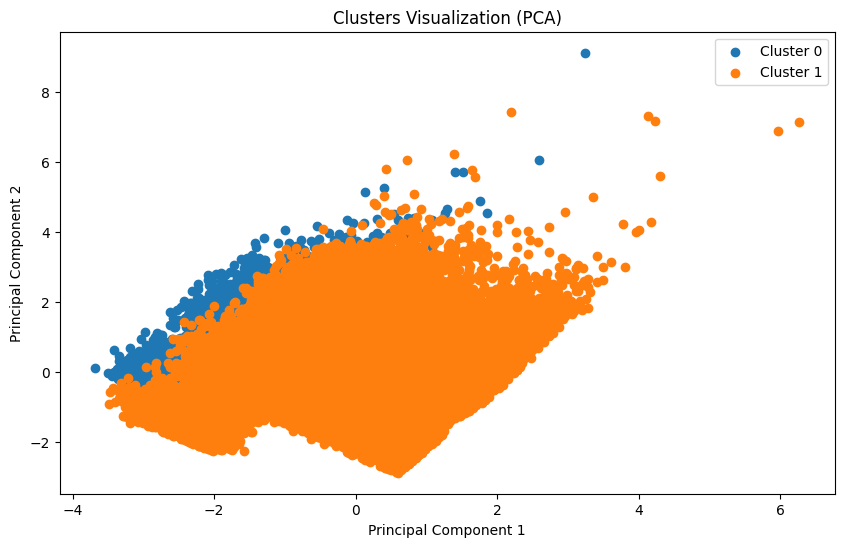

In [47]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))

for cluster in range(n_clusters):
    plt.scatter(X_pca[data['Cluster'] == cluster, 0], X_pca[data['Cluster'] == cluster, 1], label=f'Cluster {cluster}')

plt.title('Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
